In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn import (
    feature_selection,
    pipeline,
    svm,
    preprocessing,
    compose,
    model_selection
)

import warnings
from os import environ

## Чтение, файла, и прочая подготовка

In [2]:
warnings.simplefilter("ignore")
environ["PYTHONWARNINGS"] = "ignore"

In [43]:
kf = model_selection.RepeatedKFold(n_splits=3, n_repeats=2, random_state=42)

In [4]:
df = pd.read_csv("logP-707-Martel.csv")    # /home/stas/logP/
df

,Unnamed: 0,SMILES,logPow,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,CC1=CC2=C(C=C1C)NC(=O)CC2C3=CC=CC=C3OC,4.17,12.053455,12.053455,0.045556,0.045556,0.909253,17.095238,281.355,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,COC1=CC=C2C(=C1)OC(CC2=O)(C(F)(F)F)O,2.79,12.616874,12.616874,0.009514,-5.052156,0.839542,23.277778,262.183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,CC1(OC(C(O1)C(=O)N)C(=O)N)C(C)(C)C,1.60,11.140613,11.140613,0.411806,-1.123403,0.666928,35.000000,230.264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,CCOC1=CC(=CC(=C1OCC)OCC)C2=NN=C(O2)C3=CC=CO3,3.96,5.712304,5.712304,0.310004,0.310004,0.605796,10.680000,344.367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,CN(C)C1=CC=C(C=C1)C(=C)C2=CC=C(C=C2)N(C)C,5.30,4.217020,4.217020,1.056122,1.056122,0.828333,10.200000,266.388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,702,OCC#CC(C1=CC=C(F)C=C1)(O)C2=CC=C(F)C=C2,3.61,12.974979,12.974979,0.339313,-1.732014,0.824192,10.800000,274.266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,703,CCN=C1N(C(=O)C(=CC2=CN(C=3C2=CC=CC3)CC(=O)NC4=...,5.80,12.862541,12.862541,0.028961,-0.100558,0.547822,16.468750,446.576,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,704,C1=CC=C2C(=C1)N=C(N2CC(CO)O)SCCSC3=NC4=CC=CC=C...,3.29,9.964590,9.964590,0.279100,-0.847972,0.192625,13.750000,474.608,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
705,705,CCOC(=O)C1=CC=C(C=C1)C#N,1.87,11.139175,11.139175,0.354639,-0.354639,0.642998,8.923077,175.187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = df.logPow
X = df.iloc[:, 3:]
X

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,12.053455,12.053455,0.045556,0.045556,0.909253,17.095238,281.355,262.203,281.141579,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.616874,12.616874,0.009514,-5.052156,0.839542,23.277778,262.183,253.111,262.045293,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.140613,11.140613,0.411806,-1.123403,0.666928,35.000000,230.264,212.120,230.126657,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.712304,5.712304,0.310004,0.310004,0.605796,10.680000,344.367,324.207,344.137222,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.217020,4.217020,1.056122,1.056122,0.828333,10.200000,266.388,244.212,266.178299,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,12.974979,12.974979,0.339313,-1.732014,0.824192,10.800000,274.266,262.170,274.080536,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,12.862541,12.862541,0.028961,-0.100558,0.547822,16.468750,446.576,420.368,446.177647,164.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,9.964590,9.964590,0.279100,-0.847972,0.192625,13.750000,474.608,448.400,474.139547,170.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
705,11.139175,11.139175,0.354639,-0.354639,0.642998,8.923077,175.187,166.115,175.063329,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Создание стандартизатора и пайплайна

In [6]:
def standardizer(X):

    var_transformer = compose.make_column_transformer(          
        (feature_selection.VarianceThreshold(0.01), X.columns),     ##функция, которая принимает исходный df, после его выкидывает столбцы с около нулевой дисперсией, а
        remainder="drop",                                           ##затем стандартизует оставшиеся колонки в соответствии с их типом
        verbose_feature_names_out=False,
    ).set_output(transform="pandas")

    scale_transformer = compose.make_column_transformer(
        (preprocessing.StandardScaler(), compose.make_column_selector(dtype_include=float)),
        (
            preprocessing.MinMaxScaler(feature_range=(0, 1)),
            compose.make_column_selector(dtype_include=int),
        ),
        remainder="passthrough",
        verbose_feature_names_out=False,
    ).set_output(transform="pandas")


    _X = var_transformer.fit_transform(X)
    _X = scale_transformer.fit_transform(_X)

    return _X

In [7]:
svr = svm.SVR()         # модель, которую будем везде использовать

In [44]:
sfs = SFS(clone_estimator=False,            # на этом шаге создаем SFS, который будем передавать в pipeline, но касаемо Clone_estimator - если его оставить True, 
            estimator=svr,                  # то не произойдет перебор гиперпараметров из сетки, хотя в документации False, мб у них ошибка?
            k_features=(50, 100),           # можно указать диапазон отбора, но это не критично, т.к. всеравно отбор пройдет до 100 штук
            forward=True,
            floating=False,                 # более сложный метод, может удалить ранее добавленный метод
            scoring='r2',
            verbose=2,
            cv=kf,
            n_jobs=-1)

In [25]:
pipe_feats_selection = pipeline.Pipeline(
    [
        ('scaler',  preprocessing.FunctionTransformer(func=standardizer, validate = False)),    # в этом пайплайне на первом этапе происходит стандартизация, отбор и оценка на последнем шаге

        ('sfs', sfs),

        ('svr', svr) 
    ]                                                                              
)

## поиск на широкой сетке

In [32]:
wide_grid = {
    "sfs__estimator__C": 10 ** np.arange(-8., 8., 1),                     # параметр регуляризации - степень
    "sfs__estimator__epsilon": 10 ** np.arange(-8., 8., 1)                # полуширина трубки
}

In [33]:
search_param = model_selection.GridSearchCV(
    pipe_feats_selection,
    wide_grid,                                      # первая сетка, более широкая
    cv=kf,
    scoring='r2',
    n_jobs=-1,
    verbose=3,
)

In [34]:
search = search_param.fit(X, y)
search

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 157 out of 172 | elapsed:    2.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 172 out of 172 | elapsed:    2.1s finished

[2024-02-02 10:11:49] Features: 1/2 -- score: 0.46503082331373763[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 171 out of 171 | elapsed:    1.5s finished

[2024-02-02 10:11:51] Features: 2/2 -- score: 0.573707431041402

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler',
                                        FunctionTransformer(func=<function standardizer at 0x000002E04FD9F6A0>)),
                                       ('sfs',
                                        SequentialFeatureSelector(clone_estimator=False,
                                                                  cv=3,
                                                                  estimator=SVR(),
                                                                  k_features=2,
                                                                  n_jobs=-1,
                                                                  scoring='r2',
                                                                  verbose=2)),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'sfs__estimator__C': [0.01, 1, 10],
                         'sfs__estimator__epsilon': [1, 0.01, 10]},
             scoring='r2', verbose=3)

In [35]:
search.best_score_

0.563174338100172

In [36]:
search.cv_results_

{'mean_fit_time': array([17.80162684, 21.08738796, 15.66115689, 17.92558479, 22.29411443,
        16.02133807, 19.80228043, 24.23840094, 14.52992288]),
 'std_fit_time': array([0.80055282, 1.66458465, 0.72325385, 0.56396317, 0.46935025,
        0.82163668, 0.61223936, 0.3628741 , 2.01436204]),
 'mean_score_time': array([0.56478429, 0.29772409, 0.3516345 , 0.35737332, 0.27768668,
        0.4025557 , 0.2658217 , 0.0889678 , 0.19028028]),
 'std_score_time': array([0.41963729, 0.05636222, 0.10797104, 0.09171875, 0.05078215,
        0.03111225, 0.04318508, 0.03913925, 0.11323438]),
 'param_sfs__estimator__C': masked_array(data=[0.01, 0.01, 0.01, 1, 1, 1, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_sfs__estimator__epsilon': masked_array(data=[1, 0.01, 10, 1, 0.01, 10, 1, 0.01, 10],
              mask=[False, False, False, False, False, False, False, False,
     

In [38]:
a.best_params_

{'sfs__estimator__C': 1, 'sfs__estimator__epsilon': 1}

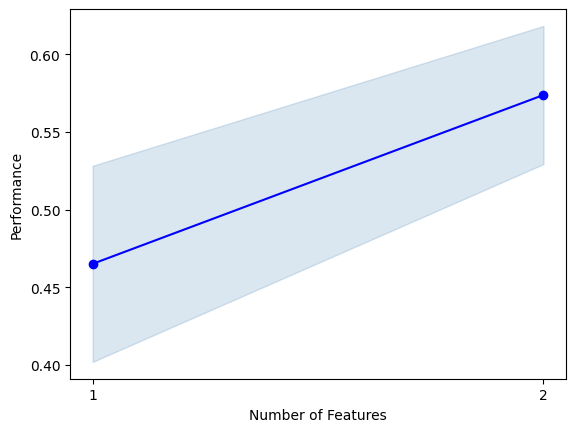

In [41]:
fig = plot_sfs(search.best_estimator_.named_steps['sfs'].get_metric_dict(), kind='std_err')
plt.show()

## поиск на узкой сетке

In [ ]:
narrow_grid = {
    "sfs__estimator__C": 10 ** np.arange(-8., 8., 1),                     # параметр регуляризации - степень
    "sfs__estimator__epsilon": np.linspace()                # полуширина трубки
}

In [ ]:
search_param_narrow = model_selection.GridSearchCV(
    pipe_feats_selection,
    narrow_grid,                                      # первая сетка, более широкая
    cv=kf,
    scoring='r2',
    n_jobs=-1,
    verbose=3,
)

In [ ]:
search_n = search_param_narrow.fit(X, y)
search_n

In [ ]:
search_n.best_score_

In [ ]:
search_n.best_params_

In [ ]:
fig_n = plot_sfs(search_n.best_estimator_.named_steps['sfs'].get_metric_dict(), kind='std_err')
plt.show()